In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
Y=df['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
X=df.drop(['Outcome'],axis='columns')
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.8,random_state=7)

In [12]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
161,7,102,74,40,105,37.2,0.204,45
288,4,96,56,17,49,20.8,0.340,26
589,0,73,0,0,0,21.1,0.342,25
680,2,56,56,28,45,24.2,0.332,22
723,5,117,86,30,105,39.1,0.251,42
...,...,...,...,...,...,...,...,...
579,2,197,70,99,0,34.7,0.575,62
502,6,0,68,41,0,39.0,0.727,41
537,0,57,60,0,0,21.7,0.735,67
196,1,105,58,0,0,24.3,0.187,21


In [13]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90,62,12,43,27.2,0.580,24
236,7,181,84,21,192,35.9,0.586,51
323,13,152,90,33,29,26.8,0.731,43
98,6,93,50,30,64,28.7,0.356,23
701,6,125,78,31,0,27.6,0.565,49
...,...,...,...,...,...,...,...,...
42,7,106,92,18,0,22.7,0.235,48
614,11,138,74,26,144,36.1,0.557,50
758,1,106,76,0,0,37.5,0.197,26
634,10,92,62,0,0,25.9,0.167,31


In [14]:
Y_train

161    0
288    0
589    0
680    0
723    0
      ..
579    1
502    1
537    0
196    0
175    1
Name: Outcome, Length: 153, dtype: int64

In [15]:
Y_test

353    0
236    1
323    1
98     0
701    1
      ..
42     0
614    1
758    0
634    0
45     1
Name: Outcome, Length: 615, dtype: int64

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

Y_predicted=lr.predict(X_test)

for i in range(len(Y_predicted)):
    if Y_predicted[i]<0.5:
        Y_predicted[i]=0
    else:
        Y_predicted[i]=1

print("The first five predicted values are:")
print(Y_predicted[0:5])
print("The first five test values are:")
print(np.array(Y_test[0:5]))

The first five predicted values are:
[0. 1. 1. 0. 0.]
The first five test values are:
[0 1 1 0 1]


In [23]:
lr.coef_

array([ 0.04409006,  0.00385123, -0.00292565,  0.00417111, -0.00049195,
        0.0101209 ,  0.32674421, -0.00439533])

In [26]:
lr.intercept_

np.float64(-0.4573745204880054)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_predicted=knn.predict(X_test)
print("The first five predicted values are:")
print(Y_predicted[0:5])
print("The first five test values are:")
print(np.array(Y_test[0:5]))
knn.score(X_test,Y_test)

The first five predicted values are:
[0 1 0 0 0]
The first five test values are:
[0 1 1 0 1]


0.7105691056910569

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_predicted=knn.predict(X_test)
print("The first five predicted values are:")
print(Y_predicted[0:5])
print("The first five test values are:")
print(np.array(Y_test[0:5]))
knn.score(X_test,Y_test)

The first five predicted values are:
[0 1 0 0 0]
The first five test values are:
[0 1 1 0 1]


0.7203252032520325

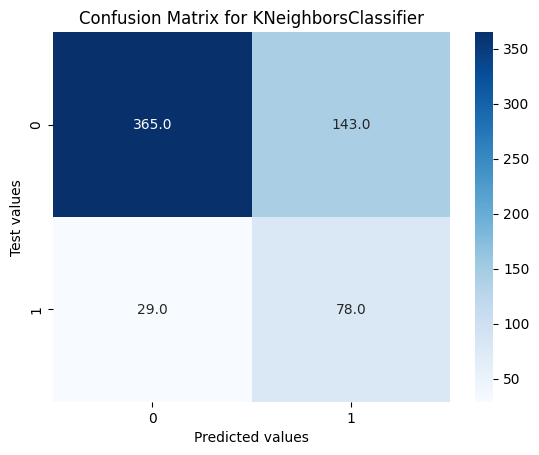

In [49]:
from sklearn import metrics
matrix=metrics.confusion_matrix(Y_predicted,Y_test)
sns.heatmap(matrix,annot=True,cmap="Blues",fmt='0.1f')
plt.xlabel("Predicted values")
plt.ylabel("Test values")
plt.title("Confusion Matrix for KNeighborsClassifier")
plt.show()